# Guia 3 Ejercicio 2

Para el data set College de ISL predecir el número de solicitudes en base a las restantes
variables utilizando: Regresión lineal, Ridge Regression y Lasso.  
En los dos últimos métodos elegir los parámetros mediante validación cruzada y reportar los
errores.

In [121]:
library("ISLR")
library("dplyr")
library(MASS)
library(glmnet) #para las regresiones Ridge y Lasso
data("College")
mydata <- College

In [122]:
# Visualizo el dataset para tener una idea acerca de cómo son los datos
head(mydata)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


In [123]:
# Siempre es interesante ver el summary de un dataset.

summary(mydata)

 Private        Apps           Accept          Enroll       Top10perc    
 No :212   Min.   :   81   Min.   :   72   Min.   :  35   Min.   : 1.00  
 Yes:565   1st Qu.:  776   1st Qu.:  604   1st Qu.: 242   1st Qu.:15.00  
           Median : 1558   Median : 1110   Median : 434   Median :23.00  
           Mean   : 3002   Mean   : 2019   Mean   : 780   Mean   :27.56  
           3rd Qu.: 3624   3rd Qu.: 2424   3rd Qu.: 902   3rd Qu.:35.00  
           Max.   :48094   Max.   :26330   Max.   :6392   Max.   :96.00  
   Top25perc      F.Undergrad     P.Undergrad         Outstate    
 Min.   :  9.0   Min.   :  139   Min.   :    1.0   Min.   : 2340  
 1st Qu.: 41.0   1st Qu.:  992   1st Qu.:   95.0   1st Qu.: 7320  
 Median : 54.0   Median : 1707   Median :  353.0   Median : 9990  
 Mean   : 55.8   Mean   : 3700   Mean   :  855.3   Mean   :10441  
 3rd Qu.: 69.0   3rd Qu.: 4005   3rd Qu.:  967.0   3rd Qu.:12925  
 Max.   :100.0   Max.   :31643   Max.   :21836.0   Max.   :21700  
   Room.Board

## Pasos a seguir

- Primero, voy a convertir la columna "Private" a una variable numérica que valga 0 para "No" y 1 para "Yes".  
- Segundo, voy a separar el dataset en tres: 70% para training, 
15% para hacer cross-validation para elegir los parámetros y por último,
un 15% para testear los modelos.

In [124]:
## Convierto la columna "Private"
mydata=mutate(mydata, Private = ifelse(Private == "No",0,1))
# Separo el dataset en tres
set.seed(222)
data_size=nrow(mydata)
mydata <- mydata[sample(nrow(mydata)),]
train <- mydata[0:floor(0.70 * data_size),]
cv <- mydata[floor(0.7 * data_size):floor(0.85 * data_size),]
test <- mydata[floor(0.85 * data_size):data_size,]
x=train
x$Apps=NULL
x=data.matrix(x)
y=data.matrix(train$Apps)
x_test=test
x_test$Apps=NULL
x_test=data.matrix(x_test)
y_test=data.matrix(test$Apps)
x_cv=cv
x_cv$Apps=NULL
x_cv=data.matrix(x_cv)
y_cv=data.matrix(cv$Apps)

In [125]:
# Visualizo cómo quedo mi dataframe
head(mydata)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
724,1,1231,1074,345,34,66,1295,105,11600,3610,400,850,66,91,12.4,37,7735,67
52,1,202,184,122,19,42,537,101,8540,3580,500,1400,61,80,8.8,32,8324,56
387,1,1232,955,303,23,58,1241,485,14990,4730,550,1250,86,92,15.2,28,9566,74
1,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
709,1,7791,4690,1499,71,92,5500,90,17865,6525,630,952,93,98,5.8,26,23850,83
740,0,1164,1062,478,12,25,2138,227,4470,2890,600,1210,33,33,16.3,10,4249,60


In [126]:
summary(train)

    Private            Apps             Accept          Enroll      
 Min.   :0.0000   Min.   :  100.0   Min.   :   90   Min.   :  35.0  
 1st Qu.:0.0000   1st Qu.:  820.5   1st Qu.:  635   1st Qu.: 254.5  
 Median :1.0000   Median : 1660.0   Median : 1221   Median : 444.0  
 Mean   :0.7293   Mean   : 3007.6   Mean   : 2053   Mean   : 789.1  
 3rd Qu.:1.0000   3rd Qu.: 3806.5   3rd Qu.: 2592   3rd Qu.: 912.0  
 Max.   :1.0000   Max.   :21804.0   Max.   :18744   Max.   :6392.0  
   Top10perc      Top25perc       F.Undergrad     P.Undergrad     
 Min.   : 1.0   Min.   :  9.00   Min.   :  199   Min.   :    1.0  
 1st Qu.:15.0   1st Qu.: 41.00   1st Qu.: 1048   1st Qu.:   98.5  
 Median :24.0   Median : 55.00   Median : 1773   Median :  355.0  
 Mean   :27.9   Mean   : 56.47   Mean   : 3713   Mean   :  885.8  
 3rd Qu.:36.0   3rd Qu.: 70.00   3rd Qu.: 4228   3rd Qu.:  967.5  
 Max.   :96.0   Max.   :100.00   Max.   :31643   Max.   :21836.0  
    Outstate       Room.Board       Books       

In [127]:
#Imprimo la cantidad de filas de train
nrow(train)

[1] 543

In [128]:
# Imprimo la cantidad de filas de cv
nrow(cv)

[1] 118

In [129]:
# Imprimo la cantidad de filas de test
nrow(test)

[1] 118

## Regresión lineal

Hago el fit de la regresión lineal y chequeo el error para el conjunto de testing. Lo correcto sería hacer un análisis de los p-values de cada uno de los predictores, pero como la idea es comparar el efecto de la regularización, se utilizarán los mismos predictores para los tres métodos (todos).

In [130]:
clf <-lm(Apps~ . , data=train)
print("El rmse para el train-set es de:")
plda<-predict(clf, train)
sqrt(sum((plda-train$Apps)**2/length(plda)))
print("El rmse para el test-set encontrado es de:")
plda<-predict(clf, test)
sqrt(sum((plda-test$Apps)**2)/length(plda))
#summary(clf)

[1] "El rmse para el train-set es de:"


[1] 910.6773

[1] "El rmse para el test-set encontrado es de:"


[1] 867.6291

## Ridge Regression

Se aplicará Ridge Regression, seleccionando valores de lambda entre 0 y 1. Nos quedamos con el valor de lambda que tenga un mínimo error en el cv set.

In [131]:
lambdas <- exp(seq(0, 10, by = .01))
rmse_train=integer(length(lambdas))
rmse_cv=integer(length(lambdas))
rmse_test=integer(length(lambdas))

In [132]:
min_rmse=100000000
lambda=0
for (idx in seq(length(lambdas))) {
    ridge_clf <- glmnet(x, y, alpha = 0, lambda = lambdas[idx])
    plda=predict(ridge_clf,newx=data.matrix(x_cv)) # make predictions
    rmse_cv[idx]=sqrt(sum((plda-y_cv)**2/length(plda)))
    if(rmse_cv[idx]<min_rmse){
        min_rmse=rmse_cv[idx]
        lambda=lambdas[idx]
    }
    plda=predict(ridge_clf,newx=data.matrix(x)) # make predictions
    rmse_train[idx]=sqrt(sum((plda-y)**2/length(plda)))
    plda=predict(ridge_clf,newx=data.matrix(x_test)) # make predictions
    rmse_test[idx]=sqrt(sum((plda-y_test)**2/length(plda)))
    }

El lambda con el minimo rmse encontrado es:[1] 1
El mínimo rmse encontrado para el cross-validation set es:[1] 1745.509


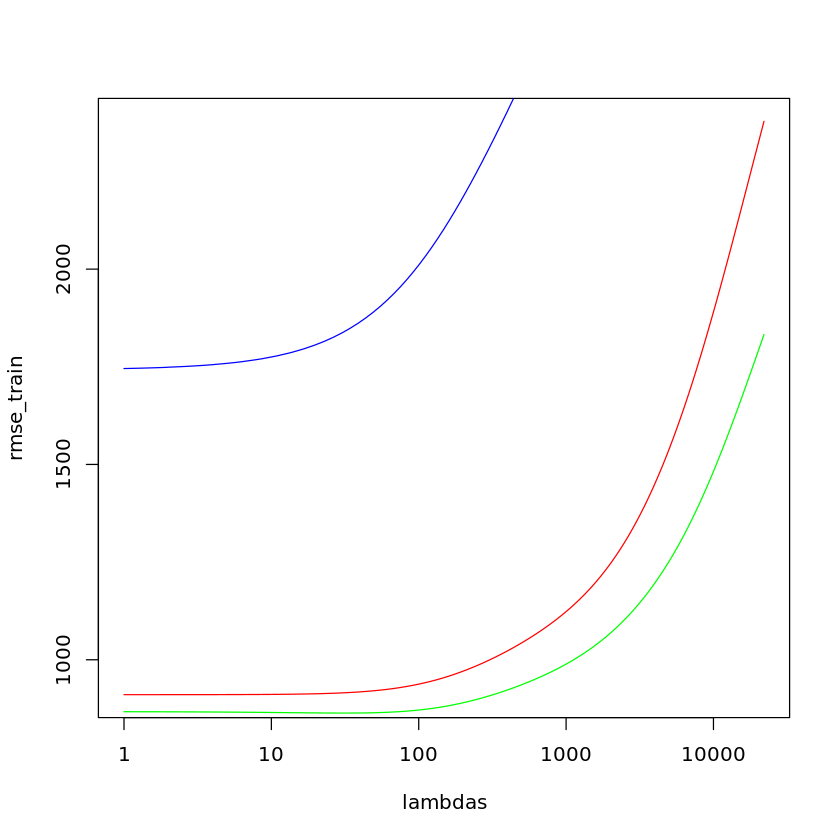

In [133]:
plot(lambdas,rmse_train,type="l",col="red", log = "x")
lines(lambdas,rmse_test,type="l",col="green")
lines(lambdas,rmse_cv,type="l",col="blue")
cat("El lambda con el minimo rmse encontrado es:")
print(lambda)
cat("El mínimo rmse encontrado para el cross-validation set es:")
print(min_rmse)

In [134]:
ridge_clf <- glmnet(x, y, alpha = 0, lambda = lambda)
print("El rmse encontrado para el train-set es:")
plda=predict(ridge_clf,newx=data.matrix(x)) # make predictions
sqrt(sum((plda-y)**2/length(plda)))
print("El rmse encontrado para el cv-set es:")
plda=predict(ridge_clf,newx=data.matrix(x_cv)) # make predictions
sqrt(sum((plda-y_cv)**2/length(plda)))
print("El rmse encontrado para el test-set es:")
plda=predict(ridge_clf,newx=data.matrix(x_test)) # make predictions
sqrt(sum((plda-y_test)**2/length(plda)))


[1] "El rmse encontrado para el train-set es:"


[1] 910.7009

[1] "El rmse encontrado para el cv-set es:"


[1] 1745.509

[1] "El rmse encontrado para el test-set es:"


[1] 867.0699

## Lasso Regression

Se aplicará Lasso Regression, seleccionando valores de lambda entre 0 y 1. Nos quedamos con el valor de lambda que tenga un mínimo error en el cv set.

In [135]:
lambdas <- exp(seq(-2, 10, by = .01))
rmse_train=integer(length(lambdas))
rmse_cv=integer(length(lambdas))
rmse_test=integer(length(lambdas))

In [136]:
min_rmse=100000000
lambda=0
for (idx in seq(length(lambdas))) {
    lasso_clf <- glmnet(x, y, alpha = 1, lambda = lambdas[idx])
    plda=predict(lasso_clf,newx=data.matrix(x_cv)) # make predictions
    rmse_cv[idx]=sqrt(sum((plda-y_cv)**2/length(plda)))
    if(rmse_cv[idx]<min_rmse){
        min_rmse=rmse_cv[idx]
        lambda=lambdas[idx]
    }
    plda=predict(lasso_clf,newx=data.matrix(x)) # make predictions
    rmse_train[idx]=sqrt(sum((plda-y)**2/length(plda)))
    plda=predict(lasso_clf,newx=data.matrix(x_test)) # make predictions
    rmse_test[idx]=sqrt(sum((plda-y_test)**2/length(plda)))
    }

El lambda con el minimo rmse encontrado es:[1] 0.1353353
El mínimo rmse encontrado para el cross-validation set es:[1] 1743.148


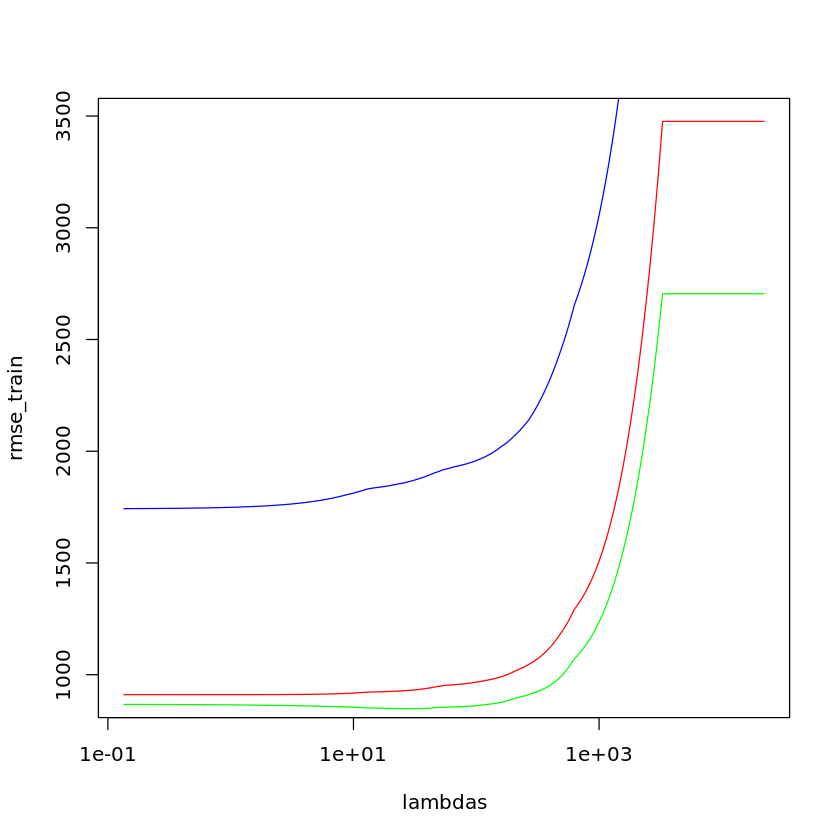

In [137]:
plot(lambdas,rmse_train,type="l",col="red", log = "x")
lines(lambdas,rmse_test,type="l",col="green")
lines(lambdas,rmse_cv,type="l",col="blue")
cat("El lambda con el minimo rmse encontrado es:")
print(lambda)
cat("El mínimo rmse encontrado para el cross-validation set es:")
print(min_rmse)

In [138]:
ridge_clf <- glmnet(x, y, alpha = 1, lambda = lambda)
print("El rmse para el train-set es:")
plda=predict(ridge_clf,newx=data.matrix(x)) # make predictions
sqrt(sum((plda-y)**2/length(plda)))
print("El rmse para el cv-set es:")
plda=predict(ridge_clf,newx=data.matrix(x_cv)) # make predictions
sqrt(sum((plda-y_cv)**2/length(plda)))
print("El rmse para el test-set es:")
plda=predict(ridge_clf,newx=data.matrix(x_test)) # make predictions
sqrt(sum((plda-y_test)**2/length(plda)))


[1] "El rmse para el train-set es:"


[1] 910.6886

[1] "El rmse para el cv-set es:"


[1] 1743.148

[1] "El rmse para el test-set es:"


[1] 867.0322

## Análisis parcial

Se nota que el dataset no es lo suficientemente grande para elegir hiperparámetros utilizando el cross-validation set como ha sido utilizado, ya que se ve que los hiperparámetros son muy dependientes del cv-set elegido.
Por este motivo se van a juntar las tablas x_cv con x_train y se volverán a aplicar las regresiones de Ridge y Lasso pero esta vez aplicando la técnica de K-folding para elegir el valor de los lambda. 
Para que la comparación sea justa entre los tres modelos, se volverá a ajustar la regresión lineal utilizando  los datos de x_cv y x_train mezclados.
Para implementar la técnica de k-folding se usará cv.glmnet.

In [139]:
# Separo el dataset en dos
# Ya está mezclado de la sección anterior
train <- mydata[0:floor(0.85 * data_size),]
test <- mydata[floor(0.85 * data_size):data_size,]
x=train
x$Apps=NULL
x=data.matrix(x)
y=data.matrix(train$Apps)
x_test=test
x_test$Apps=NULL
x_test=data.matrix(x_test)
y_test=data.matrix(test$Apps)

## Regresión Lineal

In [140]:
clf <-lm(Apps~ . , data=train)
print("El rmse para el train-set es de:")
plda<-predict(clf, train)
sqrt(sum((plda-train$Apps)**2)/length(plda))
print("El rmse para el test-set encontrado es de:")
plda<-predict(clf, test)
sqrt(sum((plda-test$Apps)**2)/length(plda))

[1] "El rmse para el train-set es de:"


[1] 1054.858

[1] "El rmse para el test-set encontrado es de:"


[1] 899.7109

## Ridge Regression

In [150]:
set.seed(321)
lambdas <- exp(seq(-20,20, by = .1))
rmse_train=integer(length(lambdas))
rmse_cv=integer(length(lambdas))
rmse_test=integer(length(lambdas))
clfs_ridge <-cv.glmnet(x, y, alpha = 0, lambda = lambdas,nfolds=220)

In [151]:
print("El lambda que da el mínimo rmse es:")
clfs_ridge$lambda.min

[1] "El lambda que da el mínimo rmse es:"


[1] 2.775083e-08

In [152]:
plda=predict(clfs_ridge,newx=data.matrix(x_test),s="lambda.min") # make predictions
sqrt(sum((plda-y_test)**2/length(plda)))

[1] 899.7109

## Lasso Regression

In [153]:
set.seed(321)
lambdas <- exp(seq(-20,20, by = .1))
rmse_train=integer(length(lambdas))
rmse_cv=integer(length(lambdas))
rmse_test=integer(length(lambdas))
clfs_lasso <-cv.glmnet(x, y, alpha = 1, lambda = lambdas)

In [154]:
print("El lambda que da el mínimo rmse es:")
clfs_lasso$lambda.min

[1] "El lambda que da el mínimo rmse es:"


[1] 2.775083e-08

In [155]:
plda=predict(clfs_lasso,newx=data.matrix(x_test),s="lambda.min") # make predictions
sqrt(sum((plda-y_test)**2/length(plda)))

[1] 899.7109

## Conclusión

Se implementaron regresiones lineales, lasso y ridge para el dataset utilizado. Se observó que los resultados son MUY dependientes del valor de la semilla utilizada por lo que no se puede sacar una conclusión categórica. Habría que hacer un análisis estadístico del dataset para ver por qué ocurre esto, pero está mas allá de los alcances del ejercicio.